In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [2]:
# set up the grid! 
N=200
x_start, x_end= -4.0, 4.0
y_start, y_end= -2.0, 2.0
x=numpy.linspace(x_start, x_end, N)
y=numpy.linspace(y_start, y_end, N)
X, Y=numpy.meshgrid(x, y)

# create the freestream!
u_inf=1.0
u_freestream=u_inf*numpy.ones((N, N), dtype=float)
v_freestream=numpy.zeros((N,N),dtype=float)

# compute the freestream function
psi_freestream=u_inf*Y

In [3]:
# get the velocity!

def vel(strength, xs, ys, X, Y):
    u=strength/(2*numpy.pi)*(X-xs)/((X-xs)**2+(Y-ys)**2)
    v=strength/(2*numpy.pi)*(Y-ys)/((X-xs)**2+(Y-ys)**2)
    return u,v

In [4]:
# get the stream function!

def stream_func(strength, xs, ys, X, Y):
    psi=strength/(2*numpy.pi)*numpy.arctan2((Y-ys), (X-xs))
    return psi

In [5]:
# call everything!

strength_source=5.0
x_source, y_source=-1.0, 0.0

u_source, v_source=vel(strength_source, x_source, y_source, X, Y)
psi_source=stream_func(strength_source, x_source, y_source, X, Y)

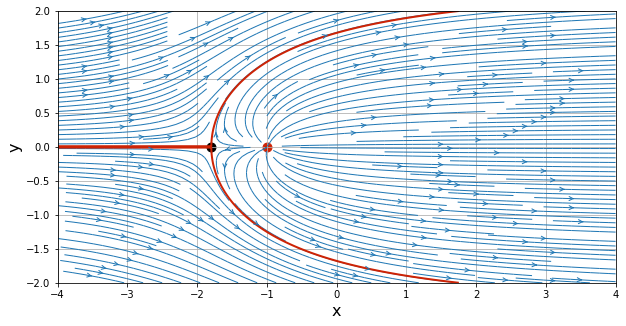

In [15]:
# superimpose the source of the freestream
u=u_freestream + u_source
v=v_freestream + v_source
psi=psi_freestream + psi_source 

width =10
height=5
pyplot.figure(figsize=(width, height))
pyplot.grid(True)
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(x_source, y_source, color='#CD2305', s=80, marker='o');

# want ot find the stagnation point where u=v=0
# so need to set u and v eqns to 0
x_stag=x_source-(strength_source/(2*numpy.pi*u_inf))
y_stag=y_source
#print(x_stag)

# plot it out!
pyplot.scatter(x_stag, y_stag, color='k', s=80, marker='o')
pyplot.contour(X, Y, psi,levels=[-strength_source / 2, strength_source / 2], 
               colors='#CD2305', linewidths=2, linestyles='solid'); 

Challenge: what is the max width of the Rankine Half Body?

Hint: use mass conservation, and think about when x is very large.

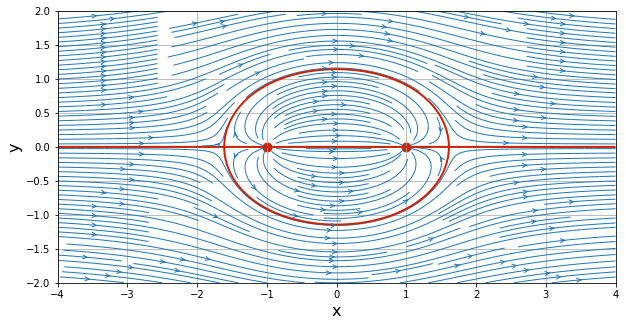

In [17]:
strength_sink=-5.0
x_sink, y_sink=1.0, 0.0

# get the velocity feild
u_sink, v_sink=vel(strength_sink, x_sink, y_sink, X, Y)
psi_sink=stream_func(strength_sink, x_sink, y_sink, X, Y)

#use superposition:
u=u_freestream + u_source + u_sink
v=v_freestream + v_source + v_sink
psi=psi_freestream + psi_source + psi_sink

#plot the streamlines:
width=10
height=5
pyplot.figure(figsize=(width, height))
pyplot.grid(True)
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter([x_source, x_sink], [y_source, y_sink], color='#CD2305', s=80, marker='o');
pyplot.contour(X, Y, psi, levels=[0.0], colors='#CD2305', linewidths=2, linestyles='solid');


Challenge Question: what is the length and width of the Rankine oval?

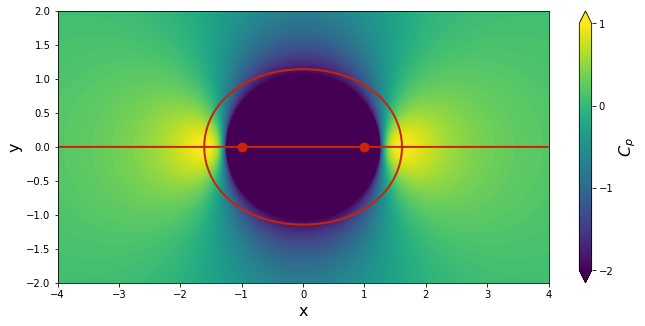

In [18]:
# compute the pressure coefficient field
cp=1.0-(u**2 + v**2)/u_inf**2

# plot it out
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(1.1 * width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
contf = pyplot.contourf(X, Y, cp,
                        levels=numpy.linspace(-2.0, 1.0, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-2.0, -1.0, 0.0, 1.0])
pyplot.scatter([x_source, x_sink], [y_source, y_sink],
               color='#CD2305', s=80, marker='o')
pyplot.contour(X, Y, psi,
               levels=[0.], colors='#CD2305', linewidths=2, linestyles='solid');